In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
prices_dataset = pd.read_csv('prices.csv', header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [3]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762,1)
yahoo_stock_prices.shape

(1762, 1)

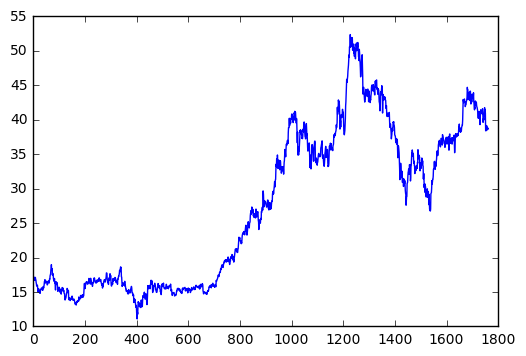

In [4]:
plt.plot(yahoo_stock_prices)
plt.show()

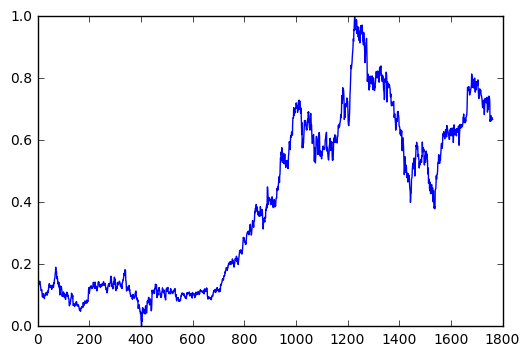

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)
plt.plot(yahoo_stock_prices)
plt.show()

In [6]:
# x_train, x_test, y_train, y_test = train_test_split(yahoo_stock_prices,)

train_size = int(len(yahoo_stock_prices) * 0.8)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size, :], yahoo_stock_prices[train_size:len(yahoo_stock_prices), :]

# print(len(train), len(test))
train.shape

(1409, 1)

In [7]:
#Convert array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape, trainY.shape

((1407, 1), (1407,))

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape, testX.shape)

(1407, 1, 1) (351, 1, 1)


In [10]:
#Build LSTM model
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('Compilation time: ', time.time()-start)

C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Compilation time:  0.03880906105041504


C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [11]:
model.fit(trainX, trainY, batch_size=128, nb_epoch=10, validation_split=0.05)

C:\Users\StrikeWade\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 2s 2ms/step - loss: 0.1350 - val_loss: 0.3084
Epoch 2/10
1336/1336 [==============================] - 0s 64us/step - loss: 0.0747 - val_loss: 0.1525
Epoch 3/10
1336/1336 [==============================] - 0s 62us/step - loss: 0.0409 - val_loss: 0.0655
Epoch 4/10
1336/1336 [==============================] - 0s 58us/step - loss: 0.0301 - val_loss: 0.0470
Epoch 5/10
1336/1336 [==============================] - 0s 67us/step - loss: 0.0211 - val_loss: 0.0257
Epoch 6/10
1336/1336 [==============================] - 0s 64us/step - loss: 0.0113 - val_loss: 0.0079
Epoch 7/10
1336/1336 [==============================] - 0s 63us/step - loss: 0.0048 - val_loss: 0.0014
Epoch 8/10
1336/1336 [==============================] - 0s 64us/step - loss: 0.0022 - val_loss: 0.0031
Epoch 9/10
1336/1336 [==============================] - 0s 67us/step - loss: 0.0020 - val_loss: 4.6531e-04
Epoch 10/10
1336/1336 [=

In [12]:
def plot_results_multiple(predicted_data, true_data, length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1,1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1,1))[length:])
    plt.show()

#Predict length consecutive values from a real one
def predict_sequence_multiple(model, firstValue, length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length):
        predicted = []
        
        print(model.predict(curr_frame[np.newaxis,:,:]))
        predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append([predicted[-1]])
    return prediction_seqs

[[0.6325682]]
[[1.52844]]
[[3.6267474]]
[[8.229167]]
[[13.951999]]
[[16.696692]]
[[17.328371]]
[[17.554207]]
[[17.65263]]
[[17.701]]
[[17.727194]]
[[17.74221]]
[[17.751339]]
[[17.757156]]
[[17.76098]]
[[17.763557]]
[[17.765322]]
[[17.766552]]
[[17.767416]]
[[17.768036]]
[[17.76848]]
[[17.7688]]
[[17.76904]]
[[17.76921]]
[[17.769339]]
[[17.769436]]
[[17.769508]]
[[17.76956]]
[[17.769604]]
[[17.769632]]
[[17.769655]]
[[17.769672]]
[[17.769688]]
[[17.769697]]
[[17.769707]]
[[17.769712]]
[[17.769718]]
[[17.76972]]
[[17.769724]]
[[17.76973]]
[[17.76973]]
[[17.769732]]
[[17.769732]]
[[17.769733]]
[[17.769733]]
[[17.769735]]
[[17.769735]]
[[17.769735]]
[[17.769735]]
[[17.769735]]
[[ 37.202415]
 [ 74.184006]
 [160.80212 ]
 [350.79    ]
 [587.0285  ]
 [700.32947 ]
 [726.40515 ]
 [735.72766 ]
 [739.7906  ]
 [741.7873  ]
 [742.8686  ]
 [743.48846 ]
 [743.8653  ]
 [744.1054  ]
 [744.2633  ]
 [744.3697  ]
 [744.4425  ]
 [744.4933  ]
 [744.52893 ]
 [744.55457 ]
 [744.5729  ]
 [744.5861  ]
 [744.5959

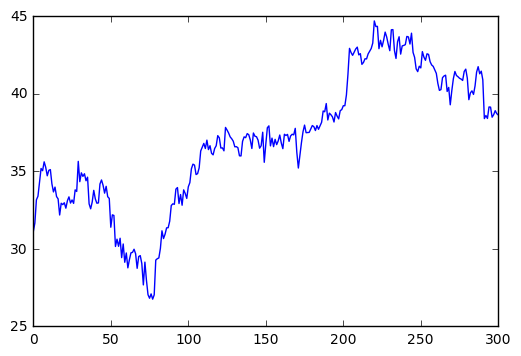

In [15]:
predict_length=50
predictions = predict_sequence_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1,1)))
plot_results_multiple(predictions, testY, predict_length)